<a href="https://colab.research.google.com/github/Kangaroo9186/Face-Mask-Detection-using-CNN/blob/main/Face_Mask_Detection_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:01<00:00, 151MB/s]
100% 163M/163M [00:01<00:00, 123MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip :
  zip.extractall()
  print('dataset is extracted')
  

dataset is extracted


In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')

In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print("The number with mask images " , len(with_mask_files))

The number with mask images  3725


In [ ]:
print("The number without mask images " , len(without_mask_files))

The number without mask images  3828


# Label creation for the 2 class of images 

with mask --> 1 
without mask -->0

In [ ]:
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = (with_mask_labels+without_mask_labels)
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


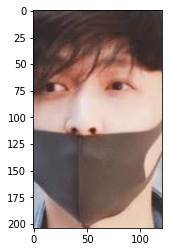

In [ ]:
#Displaying the images

img = mpimg.imread('/content/data/with_mask/with_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

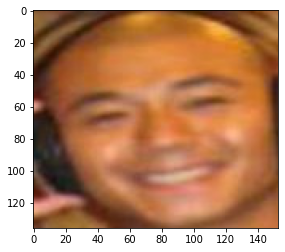

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_101.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing : 
resize the images and convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'
data = [] 
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
# data = [] 
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
len(data)

7553

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape , X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 155s 897ms/step - loss: 0.4425 - acc: 0.8166 - val_loss: 0.2489 - val_acc: 0.9091
Epoch 2/5
170/170 [==============================] - 152s 893ms/step - loss: 0.3032 - acc: 0.8823 - val_loss: 0.2327 - val_acc: 0.9107
Epoch 3/5
170/170 [==============================] - 145s 854ms/step - loss: 0.2282 - acc: 0.9112 - val_loss: 0.2224 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 148s 869ms/step - loss: 0.1981 - acc: 0.9240 - val_loss: 0.1831 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 149s 880ms/step - loss: 0.1582 - acc: 0.9384 - val_loss: 0.1826 - val_acc: 0.9372


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 222ms/step - loss: 0.1993 - acc: 0.9312
Test Accuracy = 0.9311714172363281


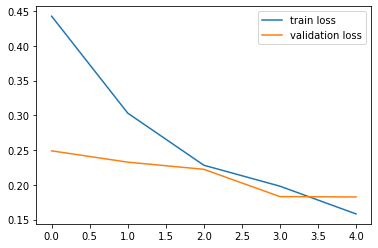

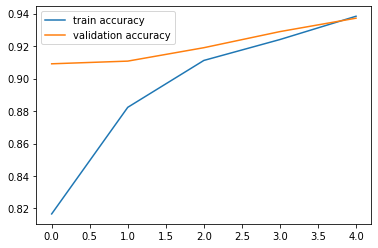

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')